# Project for "Wikishop"

Wikishop online store launches a new service. Now users can edit and supplement product descriptions like in wiki communities. That is, customers offer their edits and comment on the changes of others. The store needs a tool that will search for toxic comments and send them for moderation. 
Train the model to categorize comments into positive and negative. You have a dataset with markup on the toxicity of edits.
Goal: Build a model with a quality metric *F1* value of at least 0.75. 

## Preparation

In [1]:
pip install catboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import catboost as cb

In [3]:
data = pd.read_csv('your_path')[['text', 'toxic']]

In [4]:
data.head(5)

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


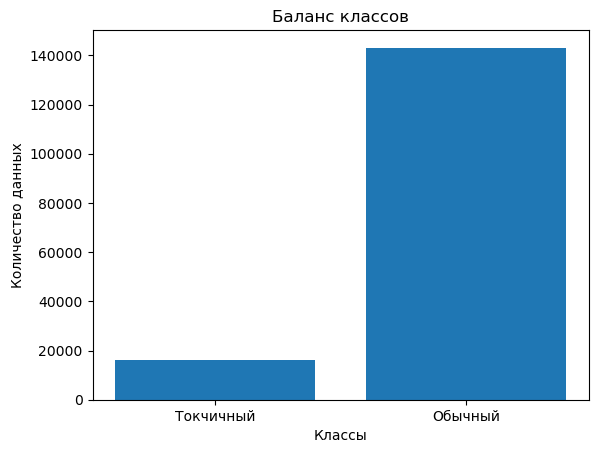

In [5]:
# Let's check the balance of the classes
classes = ['Токчичный', 'Обычный']
counts = [data[data['toxic'] == 1]['text'].count(), data[data['toxic'] != 1]['text'].count()]
plt.bar(classes, counts)
plt.xlabel('Классы')
plt.ylabel('Количество данных')
plt.title('Баланс классов')
plt.show()

**CONCLUSION**

The data has been opened, brought to the required form.

When checking the class balance, a significant class imbalance was found! Several approaches can be used to solve this problem:

1. Using methods to increase or decrease the sample. One way is to increase the sample by duplicating data from the missing class or to decrease the sample by removing members of the predominant class.

2. Changing the weights of the classes using the hyperparameters of the model. This approach allows the model to account for class imbalance in the calculation of the loss function and make the class weights more balanced.

In this case, the first approach is not optimal, because removing representatives of the predominant class may result in the loss of a large amount of data, and duplicating the missing class may result in overfitting the model. Therefore, we will use the second approach - balancing of class weights using hyperparameters of the model.

## Training

In [7]:
def get_wordnet_pos(pos):
    if pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('N'):
        return wordnet.NOUN
    elif pos.startswith('R'):
        return wordnet.ADV
    else:
        return None

def clear_lemmatize(text):
    words = nltk.word_tokenize(text)
    tagged_words = nltk.pos_tag(words)
    
    lemm = WordNetLemmatizer()
    lemmatized_words = []
    
    for word, pos in tagged_words:
        pos_tag = get_wordnet_pos(pos)
        if pos_tag is not None:
            lemmatized_word = lemm.lemmatize(word, pos=pos_tag)
        else:
            lemmatized_word = lemm.lemmatize(word)
        lemmatized_words.append(lemmatized_word)
    
    return ' '.join(lemmatized_words)

In [8]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
data['lemm'] = data['text'].apply(clear_lemmatize)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Олег\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Олег\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Олег\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Олег\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
data.head(5)

,text,toxic,lemm
0,Explanation\nWhy the edits made under my usern...,0,Explanation Why the edits make under my userna...
1,D'aww! He matches this background colour I'm s...,0,D'aww ! He match this background colour I 'm s...
2,"Hey man, I'm really not trying to edit war. It...",0,"Hey man , I 'm really not try to edit war . It..."
3,"""\nMore\nI can't make any real suggestions on ...",0,`` More I ca n't make any real suggestion on i...
4,"You, sir, are my hero. Any chance you remember...",0,"You , sir , be my hero . Any chance you rememb..."


In [10]:
# Let's create the features
features = data['lemm']
target = data['toxic']

In [11]:
features_train, features_test, target_train, target_test =\
train_test_split(features, target, test_size=0.25, random_state=404540)

In [ ]:
nltk.download('stopwords')
stop_words = set(nltk_stopwords.words('english'))
tf_idf = TfidfVectorizer(stop_words=list(stop_words))


features_train = tf_idf.fit_transform(features_train)
features_test = tf_idf.transform(features_test)

In [13]:
print('Признаки:', features_train.shape, features_test.shape)
print('Таргет:', target_train.shape, target_test.shape)

Признаки: (119469, 152172) (39823, 152172)
Таргет: (119469,) (39823,)


I committed the cells to restart the notebook faster.

In [14]:
# Логистическая регрессия
#model = LogisticRegression(fit_intercept=True, class_weight='balanced', solver='liblinear', random_state=404540)
#hyper = {'C': range(5, 15, 1)}

#grid_search = GridSearchCV(model, hyper, scoring='f1', cv=3)

#grid_search.fit(features_train, target_train)

#print('Best params:', grid_search.best_params_)
#print('Best_score:', grid_search.best_score_)

#output:
#Best params: {'C': 7}
#Best_score: 0.7678416400349272

The model showed good results and achieved the required metric indicator.

In [15]:
# Случайный лес:
#model = RandomForestClassifier(class_weight='balanced', n_jobs=-1 )

#hyper = {'n_estimators': range(10, 100, 10),
#         'max_depth': range(1, 11, 1)}

#grid_search = GridSearchCV(model, hyper, scoring='f1', cv=3)

#grid_search.fit(features_train, target_train)

#print('Best params:', grid_search.best_params_)
#print('Best_score:', grid_search.best_score_)

#output:
#Best params: {'max_depth': 9, 'n_estimators': 60}
#Best_score: 0.3656327001369751и

We are rejecting the model. The requirements have not been met.

In [16]:
#zeroes = data['toxic'].value_counts()[0]
#ones = data['toxic'].value_counts()[1]

#model = cb.CatBoostClassifier(class_weights=[1, zeroes/ones], iterations=30)
#hyper = {'depth': [4, 8],
#        'learning_rate': [0.01, 0.1, 0.5]}

#grid_search = GridSearchCV(model, hyper, scoring='f1', cv=3)
#grid_search.fit(features_train, target_train, verbose=10)

#print('Best params:', grid_search.best_params_)
#print('Best_score:', grid_search.best_score_)

#output:
#Best params: {'depth': 8, 'learning_rate': 0.5}
#Best_score: 0.6984151872649251

We are rejecting the model. The requirements have not been met.

**Conclusion**

Feature vectorization was performed using TfidfVectorizer to generate features. The dataset was split into training and test sets.

We tested three models with class balancing and selected the best hyperparameters. The models included Logistic Regression, Random Forest, and CatBoost. The best metric performance was achieved with Logistic Regression, and we will test it on the test set.

## Conclusion

In [17]:
model = LogisticRegression(fit_intercept=True, class_weight='balanced', solver='liblinear', random_state=404540, C=7)
model.fit(features_train, target_train)
pred = model.predict(features_test)
print('F1_score:',
       f1_score(target_test, pred))

F1_score: 0.7533456391324411



Success! The task can be considered solved. The final model is: LogisticRegression(fit_intercept=True, class_weight='balanced', solver='liblinear', random_state=404540, C=7)

**Final Conclusion:**

During the analysis, a significant class imbalance was discovered, which could negatively impact the performance of machine learning models. To address this issue, two approaches were proposed: oversampling or undersampling, and adjusting class weights.

Since removing instances of the majority class could lead to data loss, and duplicating instances of the minority class could cause model overfitting, the decision was made to use the second approach – balancing class weights using model hyperparameters.

To achieve this, feature vectorization was performed using TfidfVectorizer, and the dataset was split into training and test sets. Three models were then tested: Logistic Regression, Random Forest, and CatBoost. The best hyperparameters were selected for each model.

Ultimately, the best metric performance was achieved with Logistic Regression: `LogisticRegression(fit_intercept=True, class_weight='balanced', solver='liblinear', random_state=404540, C=7)`. The final metric (f1_score) achieved was 0.753.